# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/travistyler/dnd-5e-monster-manual-stats?select=cleaned_monsters_basic.csv

I will only be working with the sheet cleaned_monsters_basic.csv

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the original csv file before cleaning
monsters_original = pd.read_csv('cleaned_monsters_basic.csv')

monsters_df = pd.DataFrame(monsters_original)

monsters_df.columns

Index(['Unnamed: 0', 'name', 'size', 'monster_type', 'alignment', 'ac', 'hp',
       'strength', 'str_mod', 'dex', 'dex_mod', 'con', 'con_mod', 'intel',
       'int_mod', 'wis', 'wis_mod', 'cha', 'cha_mod', 'senses', 'languages',
       'cr', 'str_save', 'dex_save', 'con_save', 'int_save', 'wis_save',
       'cha_save', 'speed', 'swim', 'fly', 'climb', 'burrow',
       'number_legendary_actions', 'history', 'perception', 'stealth',
       'persuasion', 'insight', 'deception', 'arcana', 'religion',
       'acrobatics', 'athletics', 'intimidation'],
      dtype='object')

# Explaining some of the columns:
- name: 
  - monster name
- size: 
  - size of monster (small, medium, large, etc.); most player characters are medium, so fighting larger monsters can be harder
- monster type: 
  - Describes the kind of monster which will guide players to know how to fight the monster (ex. undead monsters are persistent and mindless)
- alignment: 
  - Describes how the monster might respond or act in a situation. There two dimensions to alignment which are chaotic, neutral, and lawful (i.e. how much does a monster will follow laws, either of their own or their society's, versus how much a monster will be unpredictable) along with evil, neutral, and good (i.e. how benevolent or malicious the monster will act towards the players)
- ac: 
  - armor class, how hard it is to hit (higher numbers are harder to hit)
- hp: 
  - health points, health of the monster (again, higher numbers mean more health and require more damage to kill)
- strength, dex (dexterity), con (constitution), intel (intelligence), wis (wisdom), and cha (charisma):
  - Strength: how strong they are
  - Dexterity: how fast are they to react
  - Constitution: how likely they are to lose focus
  - Intelligence: how smart they are (i.e. they know a tomato is a fruit) 
  - Wisdom: how wise they are (i.e. they know a tomato is a fruit, but wouldn't put it in a fruit salad)
  - Charisma is how compelling they are, socially usually
- str/dex/con/int/wis/cha_mod: 
  - these are modifiers that are attached to dice rolls when a monster makes an attack
- senses: 
  - defines if they have special abilities (i.e. see in darkness or dim light)
- languages:
  - defines a specific language the monster might know (not all monsters speak a language)
- cr: 
  - challenge rating, treated as like an "average" taking together all attributes of a monster and putting a numeric value for how difficult the monster might be in combat (higher numbers are harder monsters)
- str/dex/con/int/wis/cha_save:
  - these are modifiers that are attached to dice rolls when a monster makes a save against an attack
- speed
  - how fast the monster can move
- swim, fly, climb, burrow: 
   - these are special movement speeds for different terrains (their speed is the default if they don't have it specified otherwise)
- number_legendary_actions:
  - some monsters are legendary and have legendary actions that are taken at the end of the monster's turn. These are special attacks that typically deal serious damage and rarely miss.
- history, perception, stealth, persuasion, insight, deception, arcana, religion, acrobatics, athletics, and intimidation:
  - skills that will only be discussed when relevant to a question

In [10]:
monsters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                324 non-null    int64 
 1   name                      324 non-null    object
 2   size                      324 non-null    object
 3   monster_type              324 non-null    object
 4   alignment                 324 non-null    object
 5   ac                        324 non-null    int64 
 6   hp                        324 non-null    int64 
 7   strength                  324 non-null    int64 
 8   str_mod                   324 non-null    int64 
 9   dex                       324 non-null    int64 
 10  dex_mod                   324 non-null    int64 
 11  con                       324 non-null    int64 
 12  con_mod                   324 non-null    int64 
 13  intel                     324 non-null    int64 
 14  int_mod                   

In [2]:
#Renaming some of the columns for clarity
monsters_renamed = monsters_df.rename({'ac': 'armor_defense', 'hp' : 'health', 'cr': 'challenge_rating', 'cha': 'charisma'}, axis = 'columns')
print(monsters_renamed.columns)

Index(['Unnamed: 0', 'name', 'size', 'monster_type', 'alignment',
       'armor_defense', 'health', 'strength', 'str_mod', 'dex', 'dex_mod',
       'con', 'con_mod', 'intel', 'int_mod', 'wis', 'wis_mod', 'charisma',
       'cha_mod', 'senses', 'languages', 'challenge_rating', 'str_save',
       'dex_save', 'con_save', 'int_save', 'wis_save', 'cha_save', 'speed',
       'swim', 'fly', 'climb', 'burrow', 'number_legendary_actions', 'history',
       'perception', 'stealth', 'persuasion', 'insight', 'deception', 'arcana',
       'religion', 'acrobatics', 'athletics', 'intimidation'],
      dtype='object')


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [54]:
monsters_renamed.shape

(324, 45)

In [13]:
duplicate_rows = monsters_renamed[monsters_renamed.duplicated()]
duplicate_rows

,Unnamed: 0,name,size,monster_type,alignment,armor_defense,health,strength,str_mod,dex,...,perception,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation


In [17]:
for col in monsters_renamed.columns:
    pct_missing = np.mean(monsters_renamed[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

Unnamed: 0 - 0%
name - 0%
size - 0%
monster_type - 0%
alignment - 0%
armor_defense - 0%
health - 0%
strength - 0%
str_mod - 0%
dex - 0%
dex_mod - 0%
con - 0%
con_mod - 0%
intel - 0%
int_mod - 0%
wis - 0%
wis_mod - 0%
charisma - 0%
cha_mod - 0%
senses - 18%
languages - 40%
challenge_rating - 0%
str_save - 0%
dex_save - 0%
con_save - 0%
int_save - 0%
wis_save - 0%
cha_save - 0%
speed - 0%
swim - 0%
fly - 0%
climb - 0%
burrow - 0%
number_legendary_actions - 0%
history - 0%
perception - 0%
stealth - 0%
persuasion - 0%
insight - 0%
deception - 0%
arcana - 0%
religion - 0%
acrobatics - 0%
athletics - 0%
intimidation - 0%


In [77]:
#looking at challenge rating
#Changed the Challenge Rating to a float because 1/4, 1/2, and 1/8 are strings
monsters_renamed['challenge_rating'] = monsters_renamed['challenge_rating'].replace({'1/4': 0.25, '1/8': 0.125, '1/2': 0.5}).astype(float)
print(monsters_renamed['challenge_rating'].value_counts().sort_index(), '\n')

print(monsters_renamed['challenge_rating'].mean())
#mean challenge rating is 4.5

0.000     29
0.125     19
0.250     32
0.500     33
1.000     25
2.000     41
3.000     20
4.000     13
5.000     25
6.000     10
7.000      6
8.000     10
9.000      8
10.000     6
11.000     7
12.000     2
13.000     6
14.000     3
15.000     4
16.000     5
17.000     4
19.000     1
20.000     3
21.000     4
22.000     2
23.000     3
24.000     2
30.000     1
Name: challenge_rating, dtype: int64 

4.530478395061729


In [71]:
#looking at alignments
print(monsters_renamed['alignment'].value_counts(), '\n')

#top 3 are: unaligned, chaotic evil, and lawful evil

unaligned                                   128
chaotic evil                                 43
lawful evil                                  35
neutral evil                                 27
lawful good                                  19
neutral                                      18
any alignment                                15
chaotic good                                 12
shapechanger)                                 6
neutral good                                  5
any non-good alignment                        4
chaotic neutral                               3
lawful neutral                                3
any non-lawful alignment                      2
neutral good (50%) or neutral evil (50%)      1
any                                           1
any chaotic alignment                         1
any evil alignment                            1
Name: alignment, dtype: int64 



In [72]:
#saves
print('Strength Save: ', monsters_renamed['str_save'].mean()) #lowest save ability modifier
print('Dexterity Save: ', monsters_renamed['dex_save'].mean())
print('Constitution Save: ', monsters_renamed['con_save'].mean())
print('Intelligence Save: ', monsters_renamed['int_save'].mean()) #second lowest save ability modifier
print('Wisdom Save: ', monsters_renamed['wis_save'].mean())
print('Charisma Save: ', monsters_renamed['cha_save'].mean())

Strength Save:  0.3148148148148148
Dexterity Save:  1.0030864197530864
Constitution Save:  2.006172839506173
Intelligence Save:  0.3487654320987654
Wisdom Save:  1.5308641975308641
Charisma Save:  1.6018518518518519


In [73]:
#modifiers
print('Strength Modifier: ', monsters_renamed['str_mod'].mean())
print('Dexterity Modifier: ', monsters_renamed['dex_mod'].mean())
print('Constitution Modifier: ', monsters_renamed['con_mod'].mean())
print('Intelligence Modifier: ', monsters_renamed['int_mod'].mean()) #negative modifier average
print('Wisdom Modifier: ', monsters_renamed['wis_mod'].mean())
print('Charisma Modifier: ', monsters_renamed['cha_mod'].mean()) #negative modifier average

Strength Modifier:  2.169753086419753
Dexterity Modifier:  1.123456790123457
Constitution Modifier:  2.2839506172839505
Intelligence Modifier:  -1.308641975308642
Wisdom Modifier:  0.6419753086419753
Charisma Modifier:  -0.42592592592592593


In [67]:
#ability scores (10 is considered 'average')
print('Strength: ', monsters_renamed['strength'].mean())
print('Dexterity: ', monsters_renamed['dex'].mean())
print('Constitution: ', monsters_renamed['con'].mean())
print('Intelligence: ', monsters_renamed['intel'].mean())
print('Wisdom: ', monsters_renamed['wis'].mean())
print('Charisma: ', monsters_renamed['charisma'].mean())

#average monster strength and constitution is higher than normal

Strength:  15.117283950617283
Dexterity:  12.651234567901234
Constitution:  15.067901234567902
Intelligence:  7.799382716049383
Wisdom:  11.688271604938272
Charisma:  9.746913580246913


In [47]:
#looking at size
print(monsters_renamed['size'].value_counts().sort_index(), '\n')

size_mons = monsters_renamed['size'].value_counts(normalize = True).mul(100).sort_index().round(1).astype(str)+'%'
size_mons

#Note: most player characters are Medium size, and about 40% of the monsters are Medium as well

Gargantuan     15
Huge           32
Large         103
Medium        128
Small          22
Tiny           24
Name: size, dtype: int64 



Gargantuan     4.6%
Huge           9.9%
Large         31.8%
Medium        39.5%
Small          6.8%
Tiny           7.4%
Name: size, dtype: object

In [50]:
#looking at monster_type
print(monsters_renamed['monster_type'].value_counts().sort_values(ascending = False), '\n')

#I may not need this for analysis but it's interesting to look at

Beast                         87
Dragon                        43
Monstrosity                   35
Humanoid (any race)           21
Undead                        17
Elemental                     16
Swarm of tiny beasts          10
Giant                         10
Construct                      9
Fiend (devil)                  9
Fiend (demon)                  8
Plant                          6
Fey                            6
Celestial                      6
Aberration                     5
Humanoid (human                5
Ooze                           4
Fiend                          4
Humanoid (goblinoid)           3
Fiend (shapechanger)           3
Monstrosity (titan)            2
Monstrosity (shapechanger)     2
Humanoid (lizardfolk)          1
Undead (shapechanger)          1
Humanoid (dwarf)               1
Humanoid (sahuagin)            1
Humanoid (orc)                 1
Humanoid (merfolk)             1
Humanoid (kobold)              1
Humanoid (gnoll)               1
Humanoid (

In [31]:
#looking at legendary actions
print(monsters_renamed['number_legendary_actions'].value_counts().sort_index(), '\n')

#legendary monsters are rare, so it makes sense that there are more monsters with 0 legendary actions

0    294
3     28
4      1
5      1
Name: number_legendary_actions, dtype: int64 



In [88]:
#senses and languages
print('Number of languages known: ', monsters_renamed['languages'].count())
#lang = monsters_renamed.groupby('intel')['languages'].count()
#lang

print('Number of extra senses: ', monsters_renamed['senses'].count())

Number of languages known:  196
Number of extra senses:  267


## Visualize

Create any visualizations for your EDA here. Make note in the 4form of code comments of what your thought process is for your visualizations.

<AxesSubplot:title={'center':'Average Speed of Monsters Depending on their Size'}, xlabel='Monster Size', ylabel='Average Speed'>

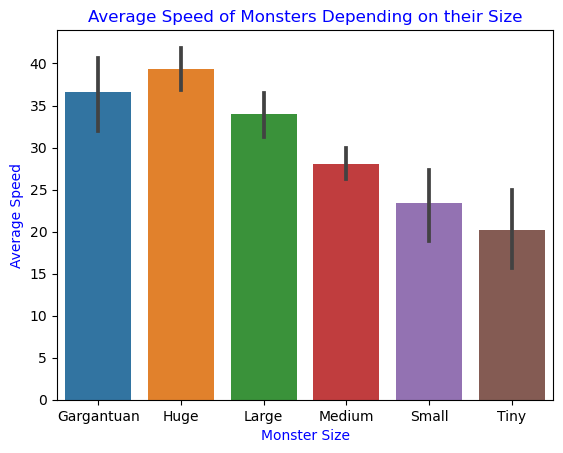

In [164]:
#df_monster_type = pd.DataFrame(monsters_renamed['monster_type'].value_counts().sort_values(ascending = False))
#top_5 = df_monster_type.nlargest(5, 'monster_type')

x = monsters_renamed['size'].sort_values(ascending = True)
y = monsters_renamed['speed']
speed_size = sns.barplot(y = y, x = x)
plt.title("Average Speed of Monsters Depending on their Size", color = "blue")
plt.xlabel("Monster Size", color = "blue")
plt.ylabel("Average Speed", color = "blue")
speed_size

Text(0.5, 1.0, 'CR vs Charisma')

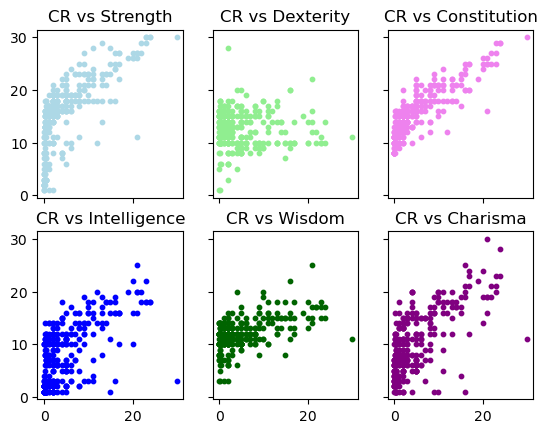

In [191]:
cr_stats = monsters_renamed.groupby('challenge_rating')[['strength', 'dex', 'con', 'intel', 'wis', 'charisma']].mean()

cr = monsters_renamed['challenge_rating']
strength = monsters_renamed['strength']
dex = monsters_renamed['dex']
con = monsters_renamed['con']
intel = monsters_renamed['intel']
wis = monsters_renamed['wis']
charisma = monsters_renamed['charisma']


fig, axs = plt.subplots(2, 3, sharex = True, sharey = True)
axs[0, 0].scatter(cr, strength, color = 'lightblue', s = 10)
axs[0, 0].set_title('CR vs Strength')

axs[0, 1].scatter(cr, dex, color = 'lightgreen', s = 10)
axs[0, 1].set_title('CR vs Dexterity')

axs[0, 2].scatter(cr, con, color = 'violet', s = 10)
axs[0, 2].set_title('CR vs Constitution')

axs[1, 0].scatter(cr, intel, color = 'blue', s = 10)
axs[1, 0].set_title('CR vs Intelligence')

axs[1, 1].scatter(cr, wis, color = 'darkgreen', s = 10)
axs[1, 1].set_title('CR vs Wisdom')

axs[1, 2].scatter(cr, charisma, color = 'purple', s = 10)
axs[1, 2].set_title('CR vs Charisma')

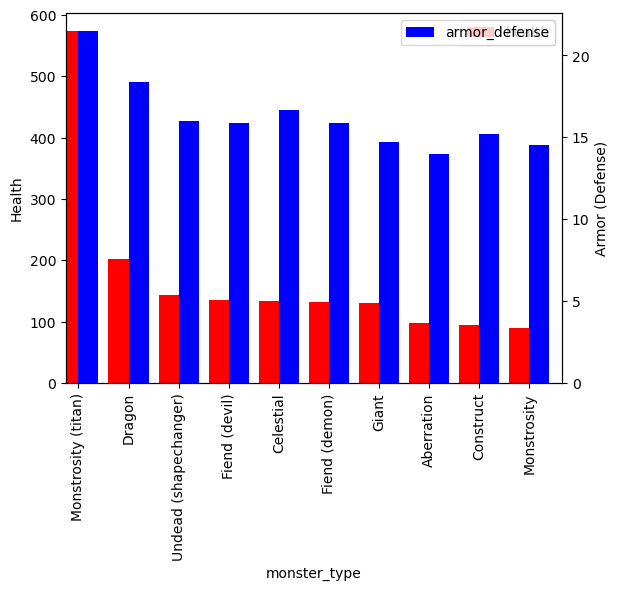

In [89]:
#Hit points and Monster Types
health_monsters = monsters_renamed.groupby('monster_type')[['health', 'armor_defense']].mean()
health_df = pd.DataFrame(health_monsters.nlargest(10, ['health', 'armor_defense']))
health_df
#health_df.plot.barh(legend = True, color = "skyblue", edgecolor = "blue")

#armor_class = health_df.sort_values('armor_defense').tail(5) 
#Results: monstrosity (titan), dragon, humanoid(human), celestial, humanoid (goblinoid)
#health_points = health_df.sort_values('health').tail(5) 
#Results: monstrosity (titan), dragon, undead (shapechanger), fiend (devil), celestial

#common_monsters = monsters_renamed['monster_type'].value_counts().nlargest(10)
#common_monsters
#print(armor_class, '\n', health_points, '\n', common_monsters)
#Results: beast, dragon, monstrosity, humanoid (any race), undead


fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

health_df.health.plot(kind='bar', color='red', ax=ax, width=width, position=1, legend = True)
health_df.armor_defense.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend = True)

ax.set_ylabel('Health')
ax2.set_ylabel('Armor (Defense)')

plt.show()


In [ ]:
#Intelligence and Alignment


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 